## Import Libraries

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Create SVM class 

In [157]:
class SVM:
    def __init__(self,  learning_rate = 1e-3, lambda_param = 1e-2, epochs = 1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.epochs = epochs
        self.w = None
        self.b = None
        
    def _init_weights_bias(self, X):
        n_features = X.shape[1]
        self.w = np.zeros(n_features)
        self.b = 0
        
    def _get_class_map(self, y):
        return np.where(y <= 0, -1, 1)
    
    def _satisfy_constraint(self, x, y, idx):
        linear_model = np.dot(x,self.w) + self.b
        return y[idx] * linear_model >= 1
    
    def _get_gradients(self, constraint, x, y, idx):
        if constraint:
            dw = self.lambda_param * self.w
            db = 0
            return dw , db
        
        dw = self.lambda_param * self.w - np.dot(y[idx], x)
        db = -y[idx]
        return dw , db
    
    def _update_params(self, dw, db):
        self.w -= self.lr * dw
        self.b -= self.lr * db
        
    
    def fit(self, X, y):
        self._init_weights_bias(X)
        y = self._get_class_map(y)
        for epoch in range(self.epochs):
            for idx, x in enumerate(X):
                constraint = self._satisfy_constraint(x,y,idx)
                dw , db = self._get_gradients(constraint, x, y, idx)
                self._update_params(dw, db)     
                
    def predict(self, X):
        estimates = np.dot(X, self.w) + self.b
        predictions = np.sign(estimates)
        return np.where(predictions == -1, 0, 1)

### Let's try linear saparable data
We will use blobs from sklearn datasets

In [170]:
from sklearn import datasets
X, y = datasets.make_blobs(
    n_samples=250, n_features=2, centers=2, cluster_std=1.05, random_state=40
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, random_state=123)

## Let's Train the Model and Make predictions

In [171]:
classifier = SVM()
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true==y_pred) / len(y_true)
    return accuracy

print("SVM Accuracy: ", accuracy(y_test, predictions))

SVM Accuracy:  1.0


## Visualization

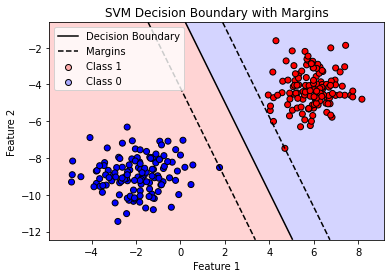

In [172]:
def plot_svm_decision_boundary(X, y, model):
    # Define the min and max values for the grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # Create a meshgrid
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    
    # Calculate the decision boundary
    Z = np.dot(np.c_[xx.ravel(), yy.ravel()], model.w) + model.b
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary and margins
    plt.contourf(xx, yy, Z, levels=[-np.inf, 0, np.inf], colors=['#FFAAAA', '#AAAAFF'], alpha=0.5)
    plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')
    
    # Plot data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, edgecolors='k')
    
    # Highlight support vectors (those points where y * (w·x + b) == 1)
    support_vectors = np.where(np.abs(np.dot(X, model.w) + model.b - 1) <= 1e-5)
    plt.scatter(X[support_vectors, 0], X[support_vectors, 1], facecolors='none', edgecolors='k', s=100, linewidth=1.5)
    
    # Set plot limits
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    
    # Add labels and title
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM Decision Boundary with Margins')
    
    # Create a custom legend
    handles = [
        plt.Line2D([0], [0], color='k', linestyle='-', label='Decision Boundary'),
        plt.Line2D([0], [0], color='k', linestyle='--', label='Margins'),
        plt.scatter([], [], color='#FFAAAA', edgecolor='k', label='Class 1'),
        plt.scatter([], [], color='#AAAAFF', edgecolor='k', label='Class 0')
    ]
    plt.legend(handles=handles, loc='upper left')
    
    # Show plot
    plt.show()
    

plot_svm_decision_boundary(X,y, classifier)

## Using SVM from Sklearn

In [173]:
from sklearn.svm import LinearSVC

In [174]:
classifier = LinearSVC(dual=True)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true==y_pred) / len(y_true)
    return accuracy

print("SVM Accuracy: ", accuracy(y_test, predictions))

SVM Accuracy:  1.0


## Visualization

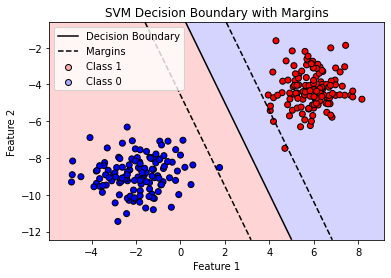

In [178]:
def plot_svm_decision_boundary(X, y, model):
    # Define the min and max values for the grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # Create a meshgrid
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    
    # Calculate the decision boundary
    Z = np.dot(np.c_[xx.ravel(), yy.ravel()], model.coef_.T) + model.intercept_
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary and margins
    plt.contourf(xx, yy, Z, levels=[-np.inf, 0, np.inf], colors=['#FFAAAA', '#AAAAFF'], alpha=0.5)
    plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')
    
    # Plot data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, edgecolors='k')
    
    # Highlight support vectors (those points where y * (w·x + b) == 1)
    support_vectors = np.where(np.abs(np.dot(X, model.coef_.T) + model.intercept_ - 1) <= 1e-5)
    plt.scatter(X[support_vectors, 0], X[support_vectors, 1], facecolors='none', edgecolors='k', s=100, linewidth=1.5)
    
    # Set plot limits
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    
    # Add labels and title
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM Decision Boundary with Margins')
    
    # Create a custom legend
    handles = [
        plt.Line2D([0], [0], color='k', linestyle='-', label='Decision Boundary'),
        plt.Line2D([0], [0], color='k', linestyle='--', label='Margins'),
        plt.scatter([], [], color='#FFAAAA', edgecolor='k', label='Class 1'),
        plt.scatter([], [], color='#AAAAFF', edgecolor='k', label='Class 0')
    ]
    plt.legend(handles=handles, loc='upper left')
    
    # Show plot
    plt.show()
    

plot_svm_decision_boundary(X,y, classifier)